In [1]:
##Exercise D.1 (Indexing in numpy or slicing)

import numpy as np

# Vector
v = np.arange(1, 21)

print("last 5:", v[-5:])
print("every second:", v[::2])
print("reverse:", v[::-1])
print("element 1,4,11 (index):", v[[1, 4, 11]])
print("bigger than mean:", v[v > v.mean()])

# Matrix
A = np.arange(1, 13 * 6 + 1).reshape(13, 6)

# flip second and third row
B = A.copy()
B[[1, 2]] = B[[2, 1]]
print("swap row 2/3:\n", B)

# add second column to entire matrix
C = A + A[:, [1]]
print("add 2nd column:\n", C)

# odd rows and even columns (0-based)
sub = A[1::2, 0::2]
print("odd rows + even cols:\n", sub)

# rows 1,4,11 (index-based)
print("rows 1,4,11:\n", A[[1, 4, 11]])


last 5: [16 17 18 19 20]
every second: [ 1  3  5  7  9 11 13 15 17 19]
reverse: [20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1]
element 1,4,11 (index): [ 2  5 12]
bigger than mean: [11 12 13 14 15 16 17 18 19 20]
swap row 2/3:
 [[ 1  2  3  4  5  6]
 [13 14 15 16 17 18]
 [ 7  8  9 10 11 12]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]
 [31 32 33 34 35 36]
 [37 38 39 40 41 42]
 [43 44 45 46 47 48]
 [49 50 51 52 53 54]
 [55 56 57 58 59 60]
 [61 62 63 64 65 66]
 [67 68 69 70 71 72]
 [73 74 75 76 77 78]]
add 2nd column:
 [[  3   4   5   6   7   8]
 [ 15  16  17  18  19  20]
 [ 27  28  29  30  31  32]
 [ 39  40  41  42  43  44]
 [ 51  52  53  54  55  56]
 [ 63  64  65  66  67  68]
 [ 75  76  77  78  79  80]
 [ 87  88  89  90  91  92]
 [ 99 100 101 102 103 104]
 [111 112 113 114 115 116]
 [123 124 125 126 127 128]
 [135 136 137 138 139 140]
 [147 148 149 150 151 152]]
odd rows + even cols:
 [[ 7  9 11]
 [19 21 23]
 [31 33 35]
 [43 45 47]
 [55 57 59]
 [67 69 71]]
rows 1,4,11:
 [[ 7 

In [2]:
##Exercise D.2 (Reshaping)
import numpy as np

# Basis
v8 = np.arange(8)
v16 = np.arange(16)

# 1) 8er Vektor -> 4x2
m42 = v8.reshape(4, 2)
print("1)\n", m42)

# 2) 8er Vektor -> 4x2 -> 2x4 in einer Zeile
m24 = np.arange(8).reshape(4, 2).reshape(2, 4)
print("2)\n", m24)

# 3) 16er Vektor -> 2x? (numpy soll ? finden)
m2x = v16.reshape(2, -1)
print("3)\n", m2x, "shape:", m2x.shape)

# 4) shape einer Matrix nutzen, um Vektor zu reshapen
A = np.arange(12).reshape(3, 4)
v12 = np.arange(12)
B = v12.reshape(A.shape)
print("4)\n", B, "shape:", B.shape)

# 5) erstellt reshape eine Kopie?
orig = np.arange(6)
view = orig.reshape(2, 3)
orig[0] = 999
print("5) orig:", orig)
print("5) view:\n", view)
# man sieht: view hat die Änderung auch -> typischerweise keine Kopie (View)

# 6) zurück zu flachem Vektor
flat1 = m42.reshape(-1)
flat2 = m42.ravel()
print("6) reshape(-1):", flat1)
print("6) ravel():    ", flat2)


1)
 [[0 1]
 [2 3]
 [4 5]
 [6 7]]
2)
 [[0 1 2 3]
 [4 5 6 7]]
3)
 [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]] shape: (2, 8)
4)
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] shape: (3, 4)
5) orig: [999   1   2   3   4   5]
5) view:
 [[999   1   2]
 [  3   4   5]]
6) reshape(-1): [0 1 2 3 4 5 6 7]
6) ravel():     [0 1 2 3 4 5 6 7]


Exact pi = 3.141593

N=    1000 | py pi=3.288000, err=0.146407 | np pi=3.184000, err=0.042407
N=   10000 | py pi=3.138400, err=0.003193 | np pi=3.149200, err=0.007607
N=  100000 | py pi=3.146360, err=0.004767 | np pi=3.138240, err=0.003353
N= 1000000 | py pi=3.144672, err=0.003079 | np pi=3.143072, err=0.001479

Average runtime per call (seconds):
N=    1000 | py=0.000112s | np=0.000040s
N=   10000 | py=0.001118s | np=0.000161s
N=  100000 | py=0.011430s | np=0.002326s
N= 1000000 | py=0.121454s | np=0.026389s


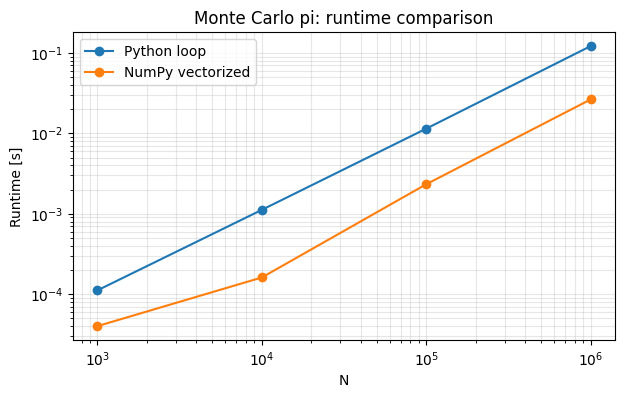

In [3]:
## Exercise D.3

import random
import timeit
import math
import numpy as np
import matplotlib.pyplot as plt


# --- basis (python version) ---
def in_unit_circle(N: int) -> int:
    M = 0
    for _ in range(N):
        x = random.random()
        y = random.random()
        if x * x + y * y <= 1.0:
            M += 1
    return M


def estimate_pi(N: int, fn) -> float:
    M = fn(N)
    return 4.0 * M / N


# --- numpy version ---
def in_unit_circle_np(N: int) -> int:
    pts = np.random.uniform(0.0, 1.0, size=(2, N))   # 2xN
    inside = (pts[0] ** 2 + pts[1] ** 2) <= 1.0      # bool array
    return int(np.sum(inside))


# --- accuracy compare ---
def get_accuracy(N: int, fn) -> float:
    return abs(estimate_pi(N, fn) - math.pi)


Ns = [1_000, 10_000, 100_000, 1_000_000]

print(f"Exact pi = {math.pi:.6f}\n")
for N in Ns:
    pi_py = estimate_pi(N, in_unit_circle)
    pi_np = estimate_pi(N, in_unit_circle_np)
    err_py = abs(pi_py - math.pi)
    err_np = abs(pi_np - math.pi)
    print(f"N={N:>8} | py pi={pi_py:.6f}, err={err_py:.6f} | np pi={pi_np:.6f}, err={err_np:.6f}")


# --- timing compare ---
times_py = []
times_np = []

for N in Ns:
    t_py = timeit.timeit(lambda: estimate_pi(N, in_unit_circle), number=3)
    t_np = timeit.timeit(lambda: estimate_pi(N, in_unit_circle_np), number=3)
    times_py.append(t_py / 3)
    times_np.append(t_np / 3)

print("\nAverage runtime per call (seconds):")
for N, t1, t2 in zip(Ns, times_py, times_np):
    print(f"N={N:>8} | py={t1:.6f}s | np={t2:.6f}s")


# --- plot runtime ---
plt.figure(figsize=(7, 4))
plt.plot(Ns, times_py, marker="o", label="Python loop")
plt.plot(Ns, times_np, marker="o", label="NumPy vectorized")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Runtime [s]")
plt.title("Monte Carlo pi: runtime comparison")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.show()


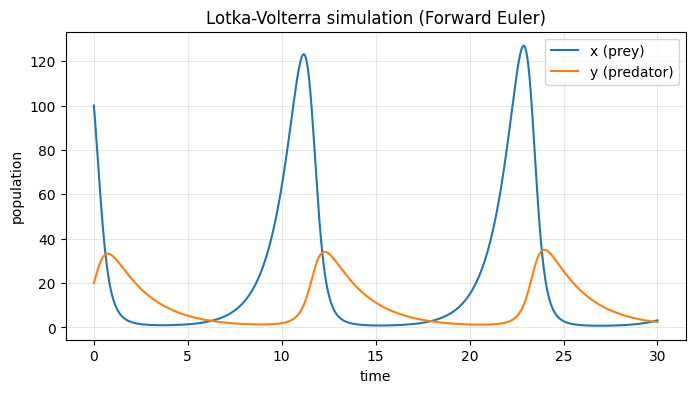

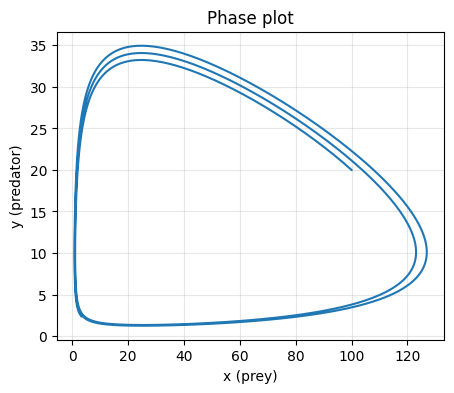

In [4]:
## Exercise D.4

import numpy as np
import matplotlib.pyplot as plt


class Prey:
    def __init__(self, y: float, delta: float, gamma: float):
        self.y = float(y)  # public population
        self._delta = None
        self._gamma = None
        self.delta = delta
        self.gamma = gamma

    @property
    def delta(self):
        return self._delta

    @delta.setter
    def delta(self, value):
        if not isinstance(value, (int, float)) or value <= 0:
            raise ValueError("delta must be a positive number")
        self._delta = float(value)

    @property
    def gamma(self):
        return self._gamma

    @gamma.setter
    def gamma(self, value):
        if not isinstance(value, (int, float)) or value <= 0:
            raise ValueError("gamma must be a positive number")
        self._gamma = float(value)


class Predator:
    def __init__(self, x: float, alpha: float, beta: float):
        self.x = float(x)  # public population
        self._alpha = None
        self._beta = None
        self.alpha = alpha
        self.beta = beta

    @property
    def alpha(self):
        return self._alpha

    @alpha.setter
    def alpha(self, value):
        if not isinstance(value, (int, float)) or value <= 0:
            raise ValueError("alpha must be a positive number")
        self._alpha = float(value)

    @property
    def beta(self):
        return self._beta

    @beta.setter
    def beta(self, value):
        if not isinstance(value, (int, float)) or value <= 0:
            raise ValueError("beta must be a positive number")
        self._beta = float(value)


class LotkaVolterraModel:
    def __init__(self, prey: Prey, predator: Predator):
        self.prey = prey
        self.predator = predator

    def _derivatives(self):
        # x = prey population, y = predator population (laut Aufgaben-Notation)
        x = self.predator.x
        y = self.prey.y

        alpha = self.predator.alpha
        beta = self.predator.beta
        delta = self.prey.delta
        gamma = self.prey.gamma

        dx = alpha * x - beta * x * y
        dy = delta * x * y - gamma * y
        return dx, dy

    def step(self, dt: float):
        dx, dy = self._derivatives()
        self.predator.x = max(0.0, self.predator.x + dt * dx)
        self.prey.y = max(0.0, self.prey.y + dt * dy)

    def simulate(self, t1: float, dt: float):
        n_steps = int(np.ceil(t1 / dt))
        t = np.linspace(0, n_steps * dt, n_steps + 1)

        x_hist = np.zeros(n_steps + 1)
        y_hist = np.zeros(n_steps + 1)

        x_hist[0] = self.predator.x
        y_hist[0] = self.prey.y

        for i in range(1, n_steps + 1):
            self.step(dt)
            x_hist[i] = self.predator.x
            y_hist[i] = self.prey.y

        return t, x_hist, y_hist


# --- test with given parameters ---
alpha = 1
beta = 0.1
gamma = 0.5
delta = 0.02
x0 = 100
y0 = 20

predator = Predator(x=x0, alpha=alpha, beta=beta)
prey = Prey(y=y0, delta=delta, gamma=gamma)

model = LotkaVolterraModel(prey=prey, predator=predator)
t, x, y = model.simulate(t1=30, dt=0.01)

# plot over time
plt.figure(figsize=(8, 4))
plt.plot(t, x, label="x (prey)")
plt.plot(t, y, label="y (predator)")
plt.xlabel("time")
plt.ylabel("population")
plt.title("Lotka-Volterra simulation (Forward Euler)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# optional phase plot
plt.figure(figsize=(5, 4))
plt.plot(x, y)
plt.xlabel("x (prey)")
plt.ylabel("y (predator)")
plt.title("Phase plot")
plt.grid(True, alpha=0.3)
plt.show()


       nm   nmqm  wfl  rooms      bj  bez  wohngut  wohnbest  ww0  zh0  \
0  741.39  10.90   68      2  1918.0    2        1         0    0    0   
1  715.82  11.01   65      2  1995.0    2        1         0    0    0   
2  528.25   8.38   63      3  1918.0    2        1         0    0    0   
3  553.99   8.52   65      3  1983.0   16        0         0    0    0   
4  698.21   6.98  100      4  1995.0   16        1         0    0    0   

   badkach0  badextra  kueche  
0         0         0       0  
1         0         0       0  
2         0         0       0  
3         0         1       0  
4         0         1       1  
Index(['nm', 'nmqm', 'wfl', 'rooms', 'bj', 'bez', 'wohngut', 'wohnbest', 'ww0',
       'zh0', 'badkach0', 'badextra', 'kueche'],
      dtype='str')
nm_max = np.float64(1789.55)
nm_min = np.float64(77.31)
nm_mean = np.float64(570.0929810034097)
nm_median = np.float64(534.3)
nm_quartiles = 0.25    389.95
0.50    534.30
0.75    700.48
Name: nm, dtype: float64
nm_v

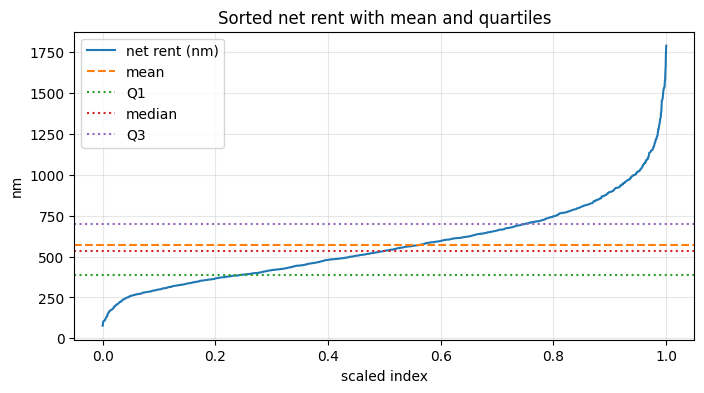

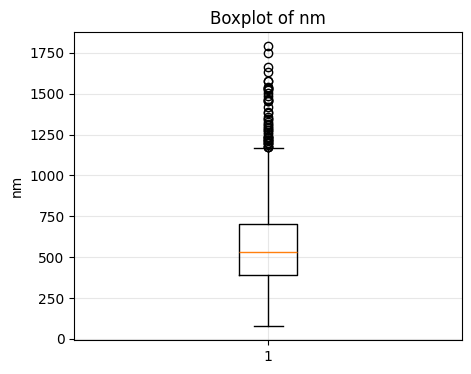

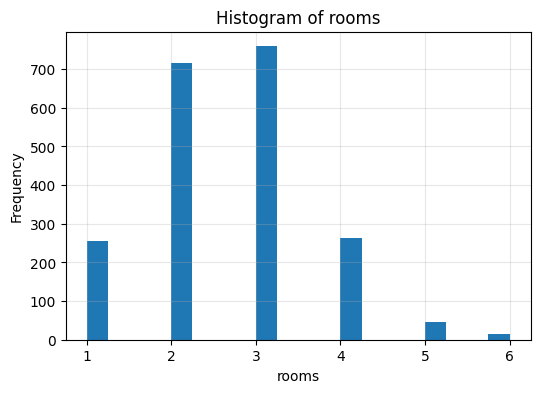

             nm      nmqm       wfl     rooms        bj
nm     1.000000  0.474797  0.707463  0.544247  0.047059
nmqm   0.474797  1.000000 -0.226830 -0.272906  0.286479
wfl    0.707463 -0.226830  1.000000  0.840645 -0.199074
rooms  0.544247 -0.272906  0.840645  1.000000 -0.152753
bj     0.047059  0.286479 -0.199074 -0.152753  1.000000


In [5]:
## Exercise D.5 (Use pandas to redo DBM Section 2)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Daten laden (direkt von LMU)
url = "https://data.ub.uni-muenchen.de/2/1/miete03.asc"
df = pd.read_csv(url, sep=r"\s+", engine="python")


print(df.head())
print(df.columns)

# 2) Basic properties für nm
nm = df["nm"]

nm_max = nm.max()
nm_min = nm.min()
nm_mean = nm.mean()
nm_median = nm.median()
nm_quartiles = nm.quantile([0.25, 0.5, 0.75])
nm_var = nm.var(ddof=0)   # wie np.var
nm_std = nm.std(ddof=0)   # wie np.std
nm_iqr = nm_quartiles.loc[0.75] - nm_quartiles.loc[0.25]

print(f"{nm_max = }")
print(f"{nm_min = }")
print(f"{nm_mean = }")
print(f"{nm_median = }")
print(f"{nm_quartiles = }")
print(f"{nm_var = }")
print(f"{nm_std = }")
print(f"{nm_iqr = }")

# Zusatz wie im Skript: Zimmer + Baujahr bei max(nm)
max_index = nm.idxmax()
rooms_at_max = int(df.loc[max_index, "rooms"])
year_at_max = int(df.loc[max_index, "bj"])
print(f"{rooms_at_max = }, {year_at_max = }")

# 3) Visualisierung ähnlich DBM

# (a) sortierte Werte + Quartile + Mean
nm_sorted = np.sort(nm.to_numpy())
x = np.linspace(0, 1, len(nm_sorted))

plt.figure(figsize=(8, 4))
plt.plot(x, nm_sorted, label="net rent (nm)")
plt.axhline(nm_mean, color="tab:orange", linestyle="--", label="mean")
plt.axhline(nm_quartiles.loc[0.25], color="tab:green", linestyle=":", label="Q1")
plt.axhline(nm_quartiles.loc[0.5], color="tab:red", linestyle=":", label="median")
plt.axhline(nm_quartiles.loc[0.75], color="tab:purple", linestyle=":", label="Q3")
plt.xlabel("scaled index")
plt.ylabel("nm")
plt.title("Sorted net rent with mean and quartiles")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# (b) Boxplot
plt.figure(figsize=(5, 4))
plt.boxplot(nm, vert=True)
plt.title("Boxplot of nm")
plt.ylabel("nm")
plt.grid(alpha=0.3)
plt.show()

# 4) Histogram (z.B. rooms)
plt.figure(figsize=(6, 4))
df["rooms"].plot(kind="hist", bins=20)
plt.title("Histogram of rooms")
plt.xlabel("rooms")
plt.grid(alpha=0.3)
plt.show()

# 5) Korrelation (z.B. nm, nmqm, wfl, rooms, bj)
corr = df[["nm", "nmqm", "wfl", "rooms", "bj"]].corr()
print(corr)


In [6]:
## Exercise D.6 (Advanced pandas)

import pandas as pd
import numpy as np

# ----------------------------
# 1) apply: Kategorien
# ----------------------------
data = pd.DataFrame({"Age": [11, 16, 30, 51]})

def category(x):
    if x <= 12:
        return "Child"
    if x <= 18:
        return "Teenager"
    return "Adult"

data["Category"] = data["Age"].apply(category)
print(data)


# ----------------------------
# 2) Death Valley laden
# ----------------------------
url = "https://raw.githubusercontent.com/ehmatthes/pcc/refs/heads/master/chapter_16/death_valley_2014.csv"
df = pd.read_csv(url)

# PST -> datetime
df["PST"] = pd.to_datetime(df["PST"], errors="coerce")

# Temperaturspalten finden (enthalten meist "Temp")
temp_cols = [c for c in df.columns if "Temp" in c]
print("Temp columns:", temp_cols)

# ----------------------------
# 3a) °F -> °C (neues DF, merge)
# ----------------------------
temp_c = df[temp_cols].apply(lambda s: (pd.to_numeric(s, errors="coerce") - 32) * 5 / 9)
temp_c = temp_c.add_suffix("_C")

df_merged = pd.concat([df[["PST"]], temp_c], axis=1)
print(df_merged.head())


# ----------------------------
# 3b) gleiche Umrechnung direkt mit apply auf Kopie
# ----------------------------
df2 = df.copy()
df2[temp_cols] = df2[temp_cols].apply(lambda s: (pd.to_numeric(s, errors="coerce") - 32) * 5 / 9)
print(df2[["PST"] + temp_cols].head())


# ----------------------------
# 4) Januarwerte um 1% korrigieren mit update
# ----------------------------
jan_mask = df2["PST"].dt.month == 1
jan_update = df2.loc[jan_mask, temp_cols] * 1.01
df2.update(jan_update)
print(df2.loc[jan_mask, ["PST"] + temp_cols].head())


# ----------------------------
# 5) pipe: mehrere Schritte
# ----------------------------
# Mean Humidity pro Monat skalieren (falls Spalte vorhanden)
hum_col = "Mean Humidity"

def scale_humidity_by_month_mean(dfin):
    if hum_col not in dfin.columns:
        return dfin
    out = dfin.copy()
    out[hum_col] = pd.to_numeric(out[hum_col], errors="coerce")
    month_mean = out.groupby(out["PST"].dt.month)[hum_col].transform("mean")
    out[hum_col] = out[hum_col] / month_mean
    return out

# WindDirDegree auf [-180, 180]
def shift_wind_dir(dfin):
    out = dfin.copy()
    if "WindDirDegrees" in out.columns:
        col = "WindDirDegrees"
    elif "WindDirDegree" in out.columns:
        col = "WindDirDegree"
    else:
        return out
    out[col] = pd.to_numeric(out[col], errors="coerce")
    out[col] = ((out[col] + 180) % 360) - 180
    return out

# PST nur Monat-Tag
def keep_month_day(dfin):
    out = dfin.copy()
    out["PST"] = out["PST"].dt.strftime("%m-%d")
    return out

df_pipe = (
    df2
    .pipe(scale_humidity_by_month_mean)
    .pipe(shift_wind_dir)
    .pipe(keep_month_day)
)

print(df_pipe.head())


   Age  Category
0   11     Child
1   16  Teenager
2   30     Adult
3   51     Adult
Temp columns: ['Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF']
         PST  Max TemperatureF_C  Mean TemperatureF_C  Min TemperatureF_C
0 2014-01-01           17.222222             5.555556           -4.444444
1 2014-01-02           18.888889             8.333333           -2.222222
2 2014-01-03           17.777778             7.777778           -2.222222
3 2014-01-04           18.888889             8.333333           -2.222222
4 2014-01-05           16.111111             6.666667           -3.333333
         PST  Max TemperatureF  Mean TemperatureF  Min TemperatureF
0 2014-01-01         17.222222           5.555556         -4.444444
1 2014-01-02         18.888889           8.333333         -2.222222
2 2014-01-03         17.777778           7.777778         -2.222222
3 2014-01-04         18.888889           8.333333         -2.222222
4 2014-01-05         16.111111           6.666667      